> # REGRESION LINEAR SIMPLE

In [5]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the data from github as URL
url = 'https://raw.githubusercontent.com/napoles-uach/clusters/master/grillos.csv'
datasets = pd.read_csv(url)
datasets.head()

,Date,Time (MDT),Chirps/15s,Chirps/13s,Temp (F),Temp(C)
0,21 Aug,2030,44.0,38.133,80.5,26.944
1,21 Aug,2100,46.4,40.213,78.5,25.833
2,21 Aug,2200,43.6,37.787,78.0,25.556
3,24 Aug,1945,35.0,30.333,73.5,23.056
4,24 Aug,2015,35.0,30.333,70.5,21.389


In [6]:
datasets.drop(['Date', 'Time (MDT)', 'Chirps/13s','Temp(C)'], axis=1, inplace=True)
datasets.columns = ['Chirps/Second', 'Temperature(ºF)']                           #renombramos 
datasets.head()

,Chirps/Second,Temperature(ºF)
0,44.0,80.5
1,46.4,78.5
2,43.6,78.0
3,35.0,73.5
4,35.0,70.5


In [7]:
datasets.describe()

,Chirps/Second,Temperature(ºF)
count,55.000000,55.000000
mean,28.805182,65.713636
std,8.865180,8.065188
min,12.500000,49.250000
25%,22.375000,60.500000
50%,29.500000,66.500000
75%,35.000000,71.500000
max,46.400000,80.500000


> ### EDA

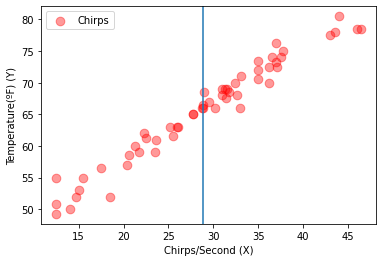

La media de chillidos es 28.81


In [8]:
media = np.mean(datasets['Chirps/Second'])
plt.scatter(x=datasets['Chirps/Second'], y=datasets['Temperature(ºF)'], c='r', alpha=0.4, marker='o', label="Chirps", s=75)
# plt.xlim(0, 50)
# plt.ylim(0, 100)
plt.xlabel("Chirps/Second (X)")
plt.ylabel("Temperature(ºF) (Y)")
plt.axvline(media)
plt.legend(loc='upper left')
plt.show()

print("La media de chillidos es",round(media,2))

In [9]:
#Set X and Y
X= datasets.iloc[:,:-1]
y= datasets['Temperature(ºF)']

In [10]:
#import libraries
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set, 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
Linear_R = LinearRegression()
Linear_R.fit(X_train,y_train)

LinearRegression()

In [11]:
# Predicting the Test set result
y_predict = Linear_R.predict(X_test)
y_predict

array([65.65688763, 69.0231518 , 59.01294519, 72.47800187, 68.22587871,
       56.53254001, 62.46779526, 60.07597598, 59.85451123, 73.36386086,
       59.36728878, 71.14921338, 73.62961856, 72.92093136, 62.73355295,
       80.89366229, 65.74547353])

> ### Visualising the Training set results

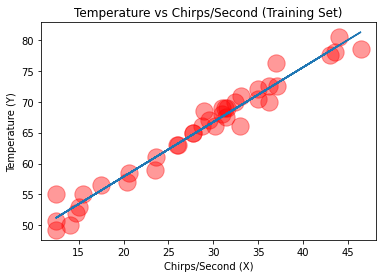

In [12]:
#Printing first graph
plt.scatter(x=X_train, y=y_train, c='r', alpha=0.4, marker='o', s=300)
plt.plot(X_train, Linear_R.predict(X_train))
# plt.xlim(0, 50)
# plt.ylim(0, 100)
plt.title('Temperature vs Chirps/Second (Training Set)')
plt.xlabel('Chirps/Second (X)')
plt.ylabel('Temperature (Y)')
plt.show()

In [13]:
print(Linear_R.coef_[0]) # Increase Y when X increase 1
print(Linear_R.intercept_) # Prediction of Y when X is 0

0.8858589921080896
40.144148655869095


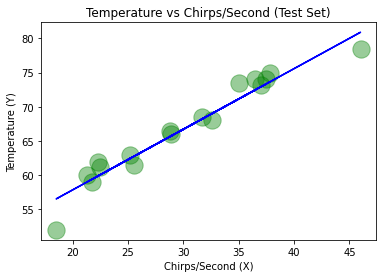

In [14]:
#Printing second graph

# Visualising the Test set results
plt.scatter(x=X_test, y=y_test, color='g', alpha=0.4, marker='o', s=300)
plt.plot(X_test, Linear_R.predict(X_test), color='b')
# plt.xlim(0, 50)
# plt.ylim(0, 100)
plt.title('Temperature vs Chirps/Second (Test Set)')
plt.xlabel('Chirps/Second (X)')
plt.ylabel('Temperature (Y)')
plt.show()

In [15]:
#Number of chirps
data = np.array([[35]])
data

array([[35]])

In [16]:
#Predicted Temperature
prediction_h = Linear_R.predict(data)
round(prediction_h[0],2)

C:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.15

In [17]:
import pickle

with open ('model_pkl','wb') as model: 
    pickle.dump(Linear_R, model)

In [18]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [35]:
result = lr.predict(data)[0]
final_predict = pd.to_numeric(result)
round(final_predict,2)



C:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.15